Minh Le - G01270908
<h2><center> ECE 427 - Computer Exercise 2 </center></h2>
<h4><center>Decision trees, random forests, extra trees, and k Nearest Neighbors</center></h4>

### Common Imports

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data in subdirectory ``data`` and save it as a pandas dataframe.

In [2]:
data_train = pd.read_csv('data/train.csv', dtype=int) # read train data
data_test = pd.read_csv('data/test.csv', dtype=int)   # read test data

In [3]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Questions
##### Examine the structure of this data set using the head method, data_train.head() ; data_test.head() How many images are in the data set? What is the dimension of the feature vectors? What are the features? #####

In [4]:
print(f"Size of training data set: {data_train.shape}")
print(f"Size of testing data set: {data_test.shape}")

Size of training data set: (60000, 785)
Size of testing data set: (10000, 785)


There are 60,000 images in the training data, and 10,000 images in the testing data set. There are 784 features for each image correspoinding to 28x28 pixels. So, the dimension of a feature vector is 1x784. However, the .shape function above reports 785 columns. The reason for that is one of the column is dedicated to labeling of the image. 

### Prepare the data and put it into arrays ``X_train``, ``y_train`` and ``X_test``, ``y_test``.

In [5]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']

### Display the $i^{th}$ image in the dataset.

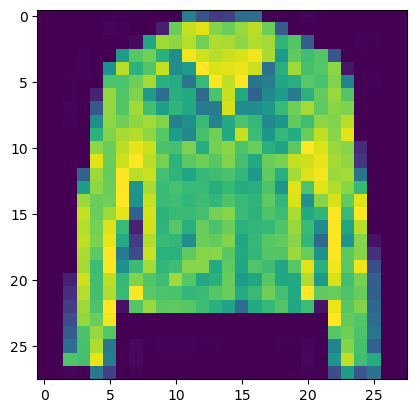

Label  9


In [6]:
i = 23                  #Put in a value for i
plt.imshow(X_train.iloc[i,:].values.reshape([28,28])) 
plt.show()
print('Label ',y_train[1])

## Decision Tree ##
Here is the basic call to learn a decision tree on ``[X_train,y_train]`` using the default values. 

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier().fit(X_train,y_train)

#### Questions
##### (a) With the default values, what is the structure of the tree? For example, are there an limits on the number of leaves, is the depth of the tree constrained, and so on #####

By default:
- Minimum number of sapmles required to split an internal node: 2
- The minimum number of samples required to be at a leaf node: 1
- Maximum number of leaf nodes: None by default. Unlimited number of leaf nodes.
- Maximum depth: None. Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples (2).

##### (b) How many leaves are in the tree? What is the purity of the leaves? What is the maximum depth of the tree? #####

In [8]:
print(f"The depth of the tree: {clf_tree.tree_.max_depth}")
print(f"The number of leaves: {clf_tree.tree_.n_leaves}")

The depth of the tree: 48
The number of leaves: 4999


There are 4999 leaves in the tree. The maximum depth of the tree is 48. Since, the tree by default is fully grown, all the leaves are pure.

##### (c) What is the training accuracy of your model on the training data? Discuss your results and any conclusions that you can make. Were you surprised by the results? #####

In [9]:
clf_tree.score(X_train,y_train)

1.0

Since the tree is fully grown, all the leaves are split until all the samples in each leaf are of the same class. That means there could be some regions only have one data sample. Therefore, the accuracy is 100%. This indicates the tree is overfitting the training data.

##### (d) What is the accuracy of your decision tree on the test set? What does this tell you? #####

In [10]:
clf_tree.score(X_test,y_test)

0.7996

The accuracy of the decision tree on the test set is much lower than the training set. This means the tree is overfitting.

### Confusion matrix

#### Assignment: ####

##### Find the confusion matrix for your classifier on the test set. What does it tell you? Are there any classes that the classifier is having more trouble with than other #####

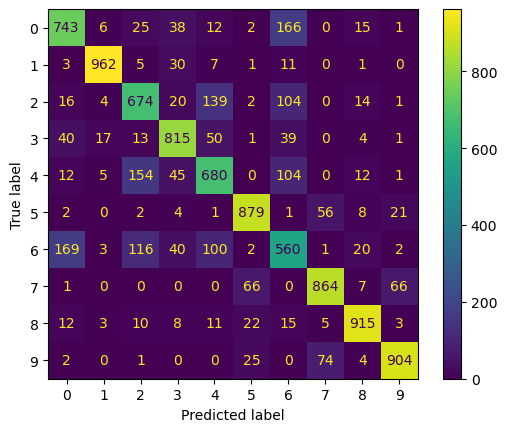

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#
cm = confusion_matrix(clf_tree.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tree.classes_)
disp.plot()
plt.show()

The classifier has trouble with class 0 and class 6. When the true lable is 0, there are 166 predictions were made to be class 6. When the true label is class 6, the model misclassified 169 times that the class is 0. Comparably, the classifer also has trouble with class 4 and class 2, where 154 predictions of class 2 were made when the true label is class 4 instead. For class 0 and class 6, it make senses for the classifer to have trouble because class 0 is T-Shirt/Top and class 6 is Shirt, that is the 2 classes have strong similiarities.

### Cross-Validation ###

In [12]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf_tree, X=X_train, y=y_train, cv=10) 

#### Assignment: ####

##### Decide how many folds that you would like to use, and use cross-validation to estimate the expected classification error of your decision tree. You probably want to use either five or ten folds. Explain the reason for the number of folds that you use. What is the advantage of choosing 10 folds versus 5? What do your results show? Is there any evidence that your tree is either underfitting or overfitting the data? Explain #####

In [13]:
print(all_accuracies)
print('Mean Accuracy %8.2f' %(all_accuracies.mean()))

[0.79333333 0.79466667 0.79316667 0.794      0.798      0.795
 0.79183333 0.789      0.79333333 0.79283333]
Mean Accuracy     0.79


With 10 folds, 90% of the data is used for training and 10% for validating.  With 5 folds, each fold uses 80% of the data for training and 20% for testing. In general, 10 folds leads to a more accurate estimate of model performance. 

10 Folds has reduced bias comparing to 5 folds: The model is evaluated 10 times on different subsets, reducing the bias associated with the random splitting of data. 10-fold training help the model capture the underlying pattern of the data.

However, 5 folds has reduced variance in model performance estimation due to more data is used in each fold. 

The accuracy scores across different fold do not have much variance, with scores ranging from 79% to 80%. This score is very close to the score of 0.79 when ``clf_tree.score(X_test,y_test)`` is excuted under **part d of Decision Tree**.

The evidence of overfitting the data is apparent when comparing the .80 score of CV to the 1.0 score from training. The big difference between the two scores indicate the model is overfitting the data.

#### Assignment ####

#### Design a decision tree with min_samples_leaf=5 and max_depth=12.

In [14]:
clf_tree2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=12).fit(X_train,y_train)

##### (a) What is the training error for your classifier. #####

In [15]:
clf_tree2.score(X_train,y_train)

0.876

##### (b) Estimate the expected error, compare your results to the tree that you designed in part (a), and discuss your results. #####

In [16]:
from sklearn.model_selection import cross_val_score
all_accuracies2 = cross_val_score(estimator=clf_tree2, X=X_train, y=y_train, cv=10)

In [17]:
print(all_accuracies2)
print('Mean Accuracy %8.2f' %(all_accuracies2.mean()))

[0.8175     0.81183333 0.81983333 0.81533333 0.81583333 0.8155
 0.8215     0.822      0.815      0.80966667]
Mean Accuracy     0.82


For the regularized tree with minimum samples per leaf of 5 and max depth of 12, the mean accuracy is 0.82, which means the expected error is 0.18. Note that the training error shown in oart (a) is 0.875, which is close to mean accuracy 0.82.

For the unconstrained, fully grown tree in the previous part, the training error is 1.0 and the mean accuracy from CV is 0.80, which is a big gap and indicates overfitting. 

##### (c) Find the confusion matrix for your classifier. Discuss what you find. Are there any pairs of classes that seem to be confused more often than others? Which ones? Does it make sense? #####

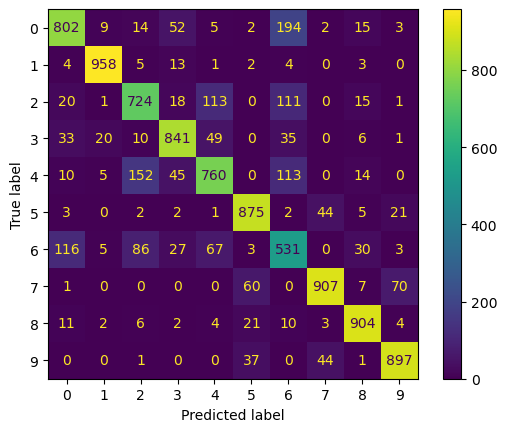

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#
cm2 = confusion_matrix(clf_tree2.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf_tree.classes_)
disp.plot()
plt.show()

Class 6 seems to be confused with class 0 more often than any other classes. It makes senses because the non-regularized tree has the same problem classifying these classes. 

### Grid Search

Assuming that a dictionary has been defined for the grid search, and stored in ``grid_param``, the grid search may be done as shown below using 5-fold CV.

#### Assignment: ####

##### Use a grid search to find the best parameters for a decision tree classifier on the data set X_train, y_train. Note: the numbers given in the example above were for illustration purposes only. Determine which parameters to use in a grid search along with the values to be evaluated. Report the best set of parameter values and the accuracy of the classifier. Note: If your grid search is taking too long, you may consider reducing the size of the data set.

In [19]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
}
gd_sr = GridSearchCV(estimator=clf_tree, param_grid=grid_param,scoring='accuracy', cv=5)

In [20]:
gd_sr.fit(X_train.iloc[:30000,:], y_train.iloc[:30000])
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.7969


Since the computation cost is too high to run on a PC, the training set is reduced by half, from 60,000 data points to 30,000 data points. The best parameters in the dictionary is depth=10, min_samples_leaf=10, and min_samples_split=10.

In [21]:
allscores=gd_sr.cv_results_['mean_test_score']
print(allscores)

[0.70343333 0.70343333 0.70343333 0.70343333 0.70343333 0.70343333
 0.7035     0.7035     0.7035     0.78073333 0.78083333 0.78046667
 0.78076667 0.78073333 0.7804     0.7808     0.781      0.78043333
 0.79566667 0.7955     0.79593333 0.79636667 0.79616667 0.79596667
 0.79683333 0.79653333 0.7969    ]


## Random Forest ##
Random forest example with out-of-bag estimate of ensemble classification error.

#### Assignment:

##### (a) Design a random forest classifier for the data set of clothing articles. Decide what the best values are to use for the hyperparameters (do not necessarily accept the default values). Use the out-of-bag samples to estimate the expected error in your random forest. How does this error compare to the training error? #####

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=200,oob_score=True, min_samples_leaf=4, max_depth=20, min_samples_split=8)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200, oob_score=True)

Certain regulization is implement to limit the computational costs of each tree. In example, the maximum depth of a tree is kept at 20, and the there must be a minimum of 8 samples for a node to be splitted.

In [23]:
print(clf_forest.oob_score_)
print(clf_forest.score(X_train,y_train))

0.88025
0.9742833333333333


The OOB score (0.88) is about 10% lower than the training score (0.97). The OOB score is a better estimate of how the model will perform on unseen data (or on test set).

In [24]:
# Get the feature importances
importances = clf_forest.feature_importances_

# Sort the feature importances in descending order and select the indices of the top ten
indices = np.argsort(importances)[::-1][:10]

# Print the feature importances of the ten most important features
for i in indices:
    print(f"Feature {i} - Importance: {importances[i]}")

Feature 574 - Importance: 0.008119220390215967
Feature 602 - Importance: 0.008092804863699496
Feature 490 - Importance: 0.007762375748299359
Feature 434 - Importance: 0.007504791940617978
Feature 518 - Importance: 0.0072908646932813535
Feature 207 - Importance: 0.006866229784893936
Feature 462 - Importance: 0.0067816384080977175
Feature 123 - Importance: 0.006634581678872642
Feature 406 - Importance: 0.006212914236481567
Feature 546 - Importance: 0.006185244099326593


The code sniplet above show the 10 most important features. From these numbers, we learn that we will definitely need more than 10 features. Reason being that the most important Feature 574 is only used 0.8% across the forest to form a split. 

##### (b) Investigate the effect of the number of trees and the number of features used in the design of each tree on the performance of your classifier. Describe/document what you find. #####

In [25]:
clf_forest_50 = RandomForestClassifier(n_estimators=50,oob_score=True, min_samples_leaf=4, max_depth=20, min_samples_split=8)
clf_forest_50.fit(X_train, y_train)
clf_forest_100 = RandomForestClassifier(n_estimators=100,oob_score=True, min_samples_leaf=4, max_depth=20, min_samples_split=8)
clf_forest_100.fit(X_train, y_train)
clf_forest_log2 = RandomForestClassifier(n_estimators=200,oob_score=True, min_samples_leaf=4, max_depth=20, min_samples_split=8, max_features = 'log2')
clf_forest_log2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200, oob_score=True)

In [26]:
print(f"Score for 50 trees: {clf_forest_50.oob_score_:.3f}")
print(f"Score for 100 trees: {clf_forest_100.oob_score_:.3f}")
print(f"Score for 200 tress: {clf_forest.oob_score_:.3f}")
print(f"Score for max feature = sqrt, and 200 trees: {clf_forest.oob_score_:.3f}")
print(f"Score for max feature = log2, and 200 trees: {clf_forest_log2.oob_score_:.3f}")

Score for 50 trees: 0.872
Score for 100 trees: 0.877
Score for 200 tress: 0.880
Score for max feature = sqrt, and 200 trees: 0.880
Score for max feature = log2, and 200 trees: 0.873


In general, the more trees are in the forest, the better the model will perform. However, we can notice the diminishing return of adding more and more trees to the forest. In example, the score improved by 0.004 between 50 tress and 100 trees. However, the score only improved less than 0.003 between 100 trees and 200 trees.
The ``sqrt`` option for max number of features also performs better than the ``log2`` options for this particular data set. ``sqrt`` options reduced the computational cost by keep each tree from becoming too complex. By limiting the the number of features that each tree is allowed to consider, ``sqrt`` options introduce diversity of opinions among the tress. This helps the model to have improved prediction accuracy.

##### (c) Compare your classifier to others that you have designed in terms of performance as well as computational complexity when performing classifications.

Among the parameters tested above, the forest with ``200 trees, max_depth=20, min_samples_leaf=4, min_samples_split=8`` performs the best with an OOB score of 0.880. Comparing to a single tree, under the Cross Validation section, the estimated expected error has a score of 0.820. Random Forest has a better performance than a single decision tree.

## Extra Trees ##

#### Assignment: ####
##### Read the documentation on ExtraTreesClassifier to see what hyperparameters that you may define, and repeat parts (a) and (b) in the random forest exercise above. Note that if you want to use oob samples to estimate the expected error, it is necessary to set oob_score=True because the default is to use the whole dataset to build the tree. You will also want to determine the appropriate number of estimators (trees) to use. #####

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
#
clf_et = ExtraTreesClassifier(n_estimators=1000, max_depth=10, min_samples_split=2, bootstrap=True, oob_score=True)
clf_et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=10, n_estimators=1000,
                     oob_score=True)

In [28]:
print(f"OOB Expected Error Score {clf_et.oob_score_:.3f}")
print(f"Training Score: {clf_et.score(X_train,y_train):.3f}")

OOB Expected Error Score 0.837
Training Score: 0.860


In [29]:
clf_et_50 = ExtraTreesClassifier(n_estimators=50, max_depth=10, min_samples_split=2, bootstrap=True, oob_score=True)
clf_et_50.fit(X_train, y_train)
clf_et_100 = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=2, bootstrap=True, oob_score=True)
clf_et_100.fit(X_train, y_train)
clf_et_500 = ExtraTreesClassifier(n_estimators=500, max_depth=10, min_samples_split=2, bootstrap=True, oob_score=True)
clf_et_500.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_depth=10, n_estimators=500,
                     oob_score=True)

In [30]:
print(f"Score for 50 trees: {clf_et_50.oob_score_:.3f}")
print(f"Score for 100 trees: {clf_et_100.oob_score_:.3f}")
print(f"Score for 500 tress: {clf_et_500.oob_score_:.3f}")

Score for 50 trees: 0.830
Score for 100 trees: 0.834
Score for 500 tress: 0.837


From the experiments above, the highest OOB score of 0.837 is obtained with 500 trees and 1000 trees. Again, as the number of tree increases, the better the model performs. However, there is a threshold where adding more trees to the forest would not yield a better performance, i.e. 500 trees versus 1000 trees model.

## K Nearest Neighbors

#### Assignment:

##### (a) Fit a five nearest neighbor classifier to the training data X_train and find its accuracy on the test set y_test #####

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train) # default 5 neighbors.

In [32]:
from sklearn.metrics import accuracy_score
y_pred = clf_knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8611

##### (b) Evaluate other nearest neighbor classifiers using different values for k to determine w at the best value for k might be #####

In [33]:
clf_knn_100= KNeighborsClassifier(n_neighbors=100, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train) 
clf_knn_50= KNeighborsClassifier(n_neighbors=50, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train) 
clf_knn_10= KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train) 

In [34]:
from sklearn.metrics import accuracy_score
accuracy_5 = accuracy_score(y_test, y_pred)
print(f"Accuracy for 5 nearest neighbors: {accuracy_5:.3f}")

# 10 nearest neighbors
y_pred_10 = clf_knn_10.predict(X_test)
accuracy_10 = accuracy_score(y_test, y_pred_10)
print(f"Accuracy for 10 nearest neighbors: {accuracy_10:.3f}")

# 50 nearest neighbors
y_pred_50 = clf_knn_50.predict(X_test)
accuracy_50 = accuracy_score(y_test, y_pred_50)
print(f"Accuracy for 50 nearest neighbors: {accuracy_50:.3f}")

# 100 nearest neighbors
y_pred_100 = clf_knn_100.predict(X_test)
accuracy_100 = accuracy_score(y_test, y_pred_100)
print(f"Accuracy for 100 nearest neighbors: {accuracy_100:.3f}")

Accuracy for 5 nearest neighbors: 0.861
Accuracy for 10 nearest neighbors: 0.859
Accuracy for 50 nearest neighbors: 0.832
Accuracy for 100 nearest neighbors: 0.821


As the number of neighbors increases, the accuracy decreases. A possible reason is that as k increases, the variance in the model increases, and the model starts to overfit the data. Therefore, the models perform worse in predicting new data (in the test set).

#### Question
##### If a brute force method is used in a nearest neighbors classifier, how much time in classifying a sample would be saved if the classifier used 50 principal components compared to the full feature set?

$$ Reduction\ Ratio = \frac{784\ features}{50\ features}=15.68 $$

This suggests that the computational complexity using a brute force nearest neighbors method is reduced by a factor of about 15.68 when using 50 principal components compared to the full set of 784 features.

### Scaling and PCA

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [36]:
from sklearn.decomposition import PCA
pca=PCA() 
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

#### Question

##### What is the default number of PCA compents for the X_train data set?

From https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

The default is n_components == min(n_samples, n_features).

So for this data set, ``n_components =  n_features = 784`` because ``n_samples = 60,000`` data points.


#### Assignment:
##### (a) Set n_components=250 and make a plot of the explained variance ratio. What does the explained variance ratio indicate? Do you see a knee in the curve that may indicate a good value to use for dimension reduction? #####

Explained variance ratio indicates how much information from the original data that the Principle Components hold. A higher ratio means that the component captures more of the variance (information/signal) in the dataset.

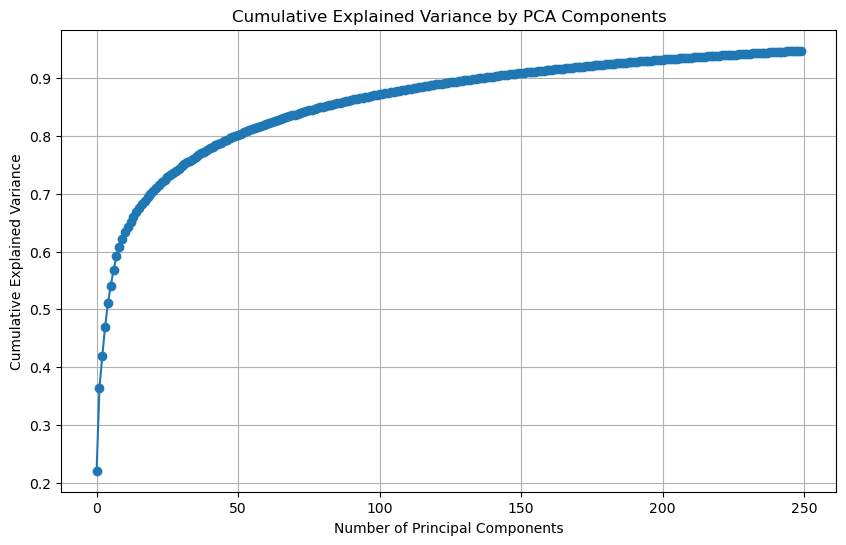

In [37]:
pca250 = PCA(n_components=250)
X_train_pca_250 = pca250.fit_transform(X_train_scaled)
#
explained_variance_ratio = pca250.explained_variance_ratio_
# 
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

150 principle components already capture over 90% of the variance (90% of the information). This is a good cut off point

##### (b) Fit a five nearest neighbor classifier using the first 50 principle components of X_train and evaluate its performance on the test set. How does its performance compare to the classifier using all 784 features? #####

In [38]:
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train_scaled)
X_test_pca_50 = pca_50.transform(X_test_scaled)

# Fit a 5-nearest neighbors classifier using the first 50 principle components
knn_50 = KNeighborsClassifier(n_neighbors=5)
knn_50.fit(X_train_pca_50, y_train)

# Predict on the PCA-reduced test set and calculate accuracy
y_pred_pca_50 = knn_50.predict(X_test_pca_50)
accuracy_pca_50 = accuracy_score(y_test, y_pred_pca_50)

print(f"Accuracy using the first 50 principal components: {accuracy_pca_50:.3f}")
print(f"Accuracy for with all 784 features: {accuracy_5:.3f}")

Accuracy using the first 50 principal components: 0.859
Accuracy for with all 784 features: 0.861


Using only 50 principal components, the accuracy is very comparable to using all 784 features. The PCA works well for this dataset in dimension reduction.

##### (c) Find the best number of principal components to use by plotting the accuracy of the classifier for principal components in the range (1, 100, 5). #####

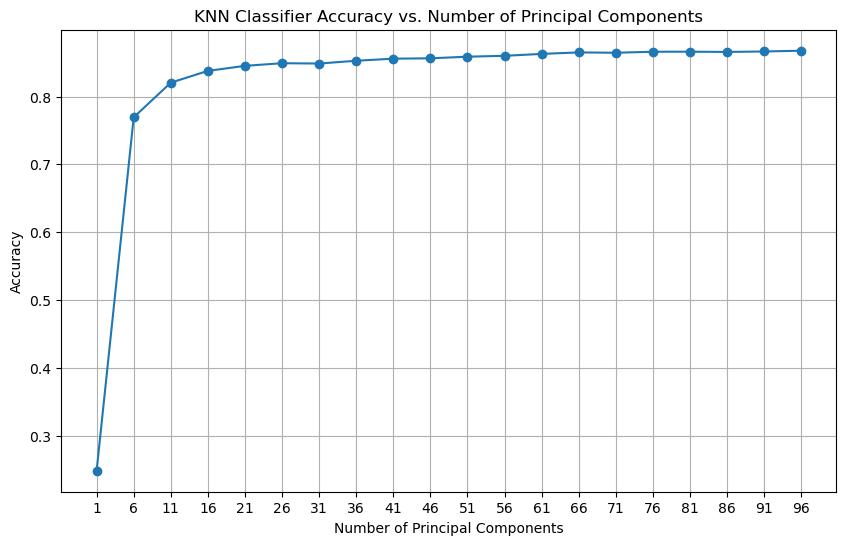

In [39]:
components_range = range(1, 101, 5)
accuracies = []

for n_components in components_range:
    # Create and apply PCA transformation
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Create and train the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. Number of Principal Components')
plt.xticks(components_range)
plt.grid(True)
plt.show()

The knee of the curve can be observed at 16 components. Before 16 component mark, the accuracy curve increases rapidly. After the 16 mark, the accuracy curve levels off, and adding more PCA would not improve accuracy significantly.

## Final Evaluation

### You have designed classifiers using Decision Trees, Random Forests, Extra Trees and Nearest Neighbors. Summarize your findings and make a recommendation of what classifier to use.


**Decision Tree** can easily overfit the data without appropriate regulizations, such as controlling the depth and number of leaves in the tree. Choosing the appriopriate parameters to regularize the tree tends to be computationally expensive when grid search is implemented. As shown in the experiment, the dictionary only has 9 parameters for grid search, but that is $ 3\times 3 \times 3 = 27 $ models to train. The grid search took more than an hour to run on a reduced-by-half dataset. The best constrained tree in this experiment attained an accuracy of **0.82** (CV score).

**Random Forest** yields better accuracy score than decision tree. However, the task of choosing how to regularize each tree in the forest is still relying on trials and errors. Since the maximum depth of a fully grown decision tree for this particular data set is 48, each tree in the forest is set to have a maximum depth of 20. In doing so, each tree will not overfitting the data, and diversity of opinions in the forest is maintained. The Best random forest attained an accuracy of **0.88** (OOB score).

The most important parameter of **K-Nearest Neighbors** is the number of neighbor k. ``k=5,10,50,100`` models are compared and the ``k=5`` yields the best accuracy score of **0.861** (score on test set). Instead of using 784 features (or pixels), PCA can be employed to reduce computational cost. With only 50 principle components, KNN with 5NN can also attained the same score of **0.861** (score on test set).

**Personal Recommendation:** Based on the score criteria, Random Forest performs the best. Althought KNN is straightforward in terms of choosing hyperparameters, KNN does not work well with high dimension data, and has to employ PCA to further preprocess the data. Comparable with PCA, Random Forest also give information about which features/pixels are most important for classification task (saved under variable ``feature_importances_``).